This notebook reproduces the lat-lon plots and a few zonal sections related to the online crashes of the multi-member parameterizations

In [1]:
# load some packages
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm

/home/b/b309162/.conda/envs/lightning_gpu_V_pytorch/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# timeseries - time step of SP-CESM model run
DS3 = {}

for k in range(2):
    fpath = f'/work/bd1179/b309162/raw_SPCESM_data/'
    fname = f'CESM2_NN2_pelayout01_ens_07.cam.h1.2013-0[7]-*-*.nc' 
    flist = glob.glob(fpath+fname)
    DS3[k] = xr.open_mfdataset(flist, decode_times=False)


In [3]:
# timeseries - time step of \overline{ANN}-CESM
DS2 = {}

kexp='NOCLDTEND'
for k in range(1):

    fpath = f'../SPCESM_data/Fronterra_runs/Cheyenne_runs/ENS_lin_boost_6_whole_year/'
    fname = f'CESM2_ANNs_ncpl-48_spcam-dt-20_2013-02-01_partial-coupling-NOCLDTEND_ens_lin_ANN_06_boost_whole_year.cam.h{k+3}.2013-0[7]-*-*.nc'
    flist = glob.glob(fpath+fname)
    DS2[k] = xr.open_mfdataset(flist, decode_times=False)


In [4]:
# timeseries - time step of ANN-ens-CESM
DS2_stoch = {}

for k in range(1):

    fpath = f'../SPCESM_data/Fronterra_runs/Cheyenne_runs/stoch_ENS_lin_boost_6_whole_year/'
    fname = f'CESM2_ANNs_lin_ncpl-48_spcam-dt-20_2013-02-01_partial-coupling-NOCLDTEND_ANN_6_boost_sENS_5_whole_year.cam.h{k+3}.2013-0[7]-*-*.nc'
    flist = glob.glob(fpath+fname)
    DS2_stoch[k] = xr.open_mfdataset(flist, decode_times=False)



In [5]:
# timeseries - time step of ZM-CESM
DS_ctr_cam = {}

for k in range(1):
    fpath = f'../SPCESM_data/Fronterra_runs/Cheyenne_runs/CAM_ctr_whole_year/'
    fname = f'CESM2_2013-02-01_ctrl-CAM.cam.h1.2013-0[7]-*-*.nc' 
    flist = glob.glob(fpath+fname)
    DS_ctr_cam[k] = xr.open_mfdataset(flist, decode_times=False)


In [6]:
time_axis=DS_ctr_cam[0]['time'].values


In [7]:
DS_ctr_cam[0]['time']

<xarray.DataArray 'time' (time: 1488)>
array([150.      , 150.020833, 150.041667, ..., 180.9375  , 180.958333,
       180.979167])
Coordinates:
  * time     (time) float64 150.0 150.0 150.0 150.1 ... 180.9 180.9 181.0 181.0
Attributes:
    long_name:  time
    units:      days since 2013-02-01 00:00:00
    calendar:   noleap
    bounds:     time_bnds

In [8]:
# select temperature fields before surface coupling for different params

T_DNN_overline=DS2[0]['T2'].values
T_DNN_ens=DS2_stoch[0]['T2'].values
T_ZM_scheme=DS_ctr_cam[0]['T'].values




In [9]:
T_SP_run=DS3[0]['TBC'].values


In [20]:
lat=np.arange(-90,90,180/96)
lon=np.arange(0,360,360/144)

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import matplotlib.image as imag

In [22]:
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import math

import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


In [23]:
#load vertical axis in pressure coords 


from cbrain.data_generator import DataGenerator

test_xr=xr.open_dataset('/work/bd1179/from_Mistral/bd1179/b381624/CESM2_NN2_pelayout01_ens_07.cam.h1.2013-01-01-00000.nc')
hybi=test_xr.hybi
hyai=test_xr.hyai

PS = 1e5; P0 = 1e5;
P = P0*hyai+PS*hybi; # Total pressure [Pa]
dP = P[1:]-P[:-1];


In [35]:
fz = 20
lw = 4
siz = 100

plt.rc('text', usetex=False)
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif', size=fz)
mpl.rcParams['lines.linewidth'] = lw


In [36]:
# Create custom colormap following [https://stackoverflow.com/questions/14777066/matplotlib-discrete-colorbar]
def color_map_personalizer(Number_of_Colors,vmin__,vmax__,colorscale):
    
    cmap = mpl.colormaps[colorscale]
    # extract all colors from the .seismic map
    cmaplist = [cmap(i) for i in np.arange(cmap.N)]
    # create the new map
    cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
    # define the bins and normalize
    bounds = np.linspace(vmin__, vmax__, Number_of_Colors)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    return cmap , norm

In [37]:
vmin0 = 200
vmax0 = 320

In [38]:
seism_,norm_seism=color_map_personalizer(21,vmin0,vmax0,'gist_stern')

In [39]:
vmin0_diff =-50
vmax0_diff = 50

In [40]:
seism_diff,norm_seism_=color_map_personalizer(21,vmin0_diff,vmax0_diff,'RdBu_r')

# crash day of DNN-ens-SP-CESM

In [30]:
# analyse the temperature fields on the 4th July the day when DNN-ens-SP-CESM crahes 

crash_day_DNN_ens_SP_CESM=time_axis[T_DNN_ens[:,1,1,1].size]
crash_1=T_DNN_ens[:,1,1,1].size

In [31]:
crash_day_DNN_ens_SP_CESM

153.54166666666666

In [32]:
# get the date of the crash 
day_of_failure_round=int(np.round(crash_day_DNN_ens_SP_CESM-28-31-30-31-30,0))
day_of_failure_round

4

Text(0.0, 1.0, 'd) ZM-CESM - SP-CESM')

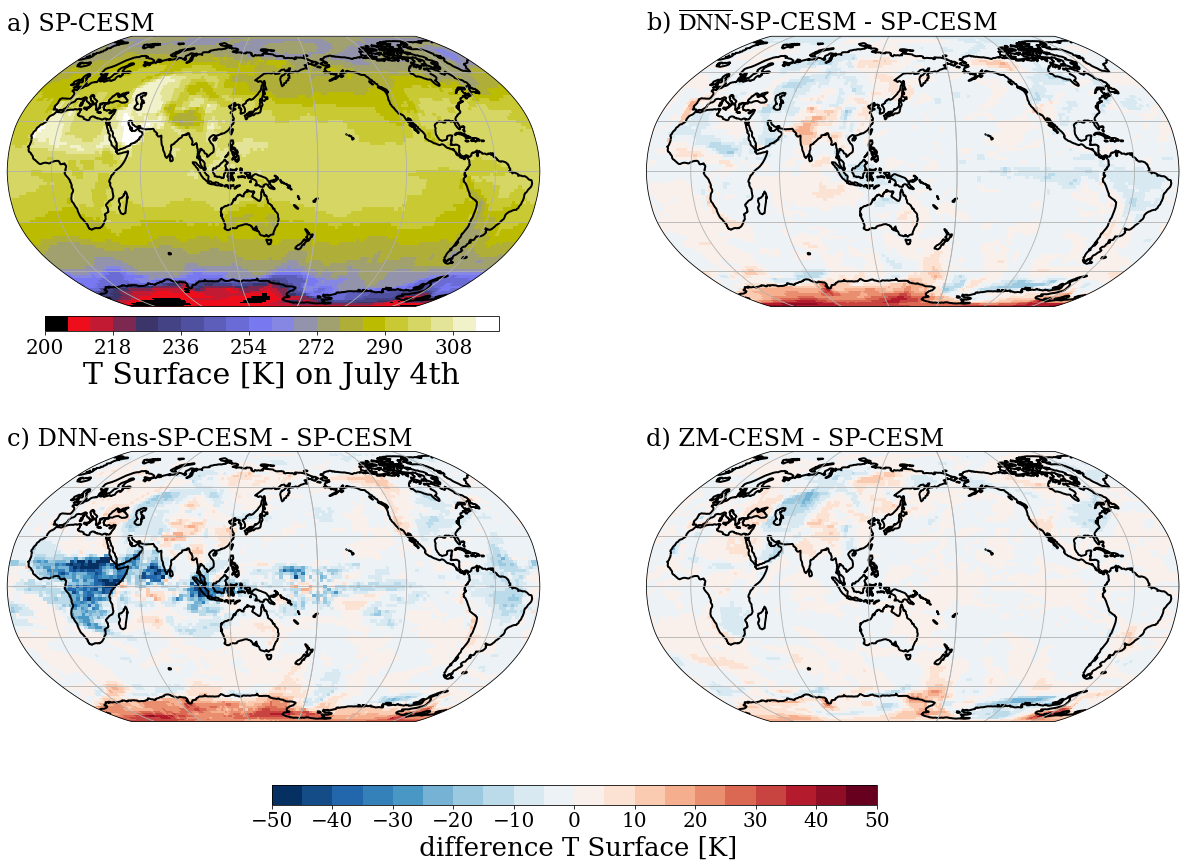

In [41]:
# plot surface T and T diff with respect to SP-CESM on time step before crash of stochastic multi-member DNN-ens-SP-CESM

fig, ax = plt.subplots(2,2,subplot_kw={'projection':ccrs.Robinson(central_longitude=150)},figsize=(21,14))

imag=ax[0][0].pcolormesh(lon,lat,T_SP_run[crash_1-1,-1,:,:],
                                cmap=seism_, norm=norm_seism, 
                                transform=ccrs.PlateCarree())
ax[0][0].coastlines(color='black',linewidth=2)
ax[0][0].gridlines()
ax[0][0].set_title(r'a) SP-CESM',loc='left')
cbar_ax=fig.add_axes([0.15, 0.55, 0.30, 0.015])
cb=plt.colorbar(imag, label=r"T Surface [K]",cax=cbar_ax,orientation='horizontal')
cb.set_label(label=r"T Surface [K] on July "+ str(day_of_failure_round)+"th",fontsize=fz*1.5)
             
imag_2=ax[0][1].pcolormesh(lon,lat,T_DNN_overline[crash_1-1,-1,:,:]-T_SP_run[crash_1,-1,:,:],
                                 cmap=seism_diff, norm=norm_seism_, 
                                transform=ccrs.PlateCarree())
ax[0][1].coastlines(color='black',linewidth=2)
ax[0][1].gridlines()
ax[0][1].set_title(r'b) $\overline{\mathrm{DNN}}$-SP-CESM - SP-CESM',loc='left')
    
cbar_ax_2 = fig.add_axes([0.3, 0.08, 0.40, 0.02])
cb=plt.colorbar(imag_2,cax=cbar_ax_2,ticks=np.arange(vmin0_diff,vmax0_diff+0.001,10),orientation='horizontal')
cb.set_label(label=r" difference T Surface [K]",fontsize=fz*1.3)    


ax[1][0].pcolormesh(lon,lat,T_DNN_ens[crash_1-1,-1,:,:]-T_SP_run[crash_1,-1,:,:],
                                 cmap=seism_diff, norm=norm_seism_, 
                                transform=ccrs.PlateCarree())
ax[1][0].coastlines(color='black',linewidth=2)
ax[1][0].gridlines()
ax[1][0].set_title(r'c) DNN-ens-SP-CESM - SP-CESM',loc='left')



ax[1][1].pcolormesh(lon,lat,T_ZM_scheme[crash_1-1,-1,:,:]-T_SP_run[crash_1,-1,:,:],
                                 cmap=seism_diff, norm=norm_seism_, 
                                transform=ccrs.PlateCarree())
ax[1][1].coastlines(color='black',linewidth=2)
ax[1][1].gridlines()
ax[1][1].set_title(r'd) ZM-CESM - SP-CESM',loc='left')


# crash day of /overline{DNN}-SP-CESM

In [34]:
# crash analysis for deterministic multi-member /overline{DNN}-SP-CESM
crash_day_DNN_overline_SP_CESM=time_axis[T_DNN_overline[:,1,1,1].size]
crash_2=T_DNN_overline[:,1,1,1].size

In [35]:
crash_day_DNN_overline_SP_CESM

167.66666666666666

In [36]:
# day when $/overline{DNN}$-ens-SP-CESM fails
day_of_failure_round_2=int(np.round(crash_day_DNN_overline_SP_CESM-28-31-30-31-30,0))
day_of_failure_round_2

18

Text(0.0, 1.0, 'c) ZM-CESM - SP-CESM')

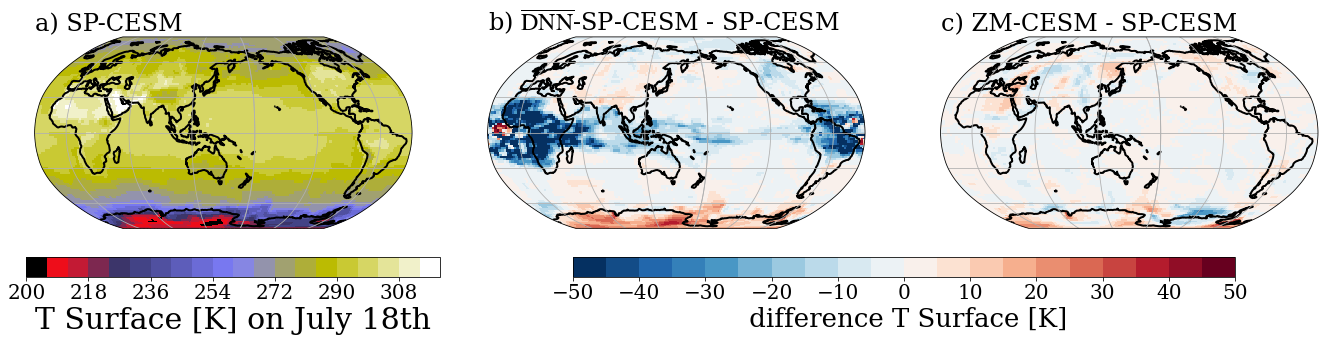

In [100]:
#lat-lon plot for SP-CESM, $/overline{DNN}$-ens-SP-CESM, ZM-CESM and Temp

fig, ax = plt.subplots(1,3,subplot_kw={'projection':ccrs.Robinson(central_longitude=150)},figsize=(23,9))

imag=ax[0].pcolormesh(lon,lat,T_SP_run[crash_2-1,-1,:,:],
                                cmap=seism_, norm=norm_seism, 
                                transform=ccrs.PlateCarree())
ax[0].coastlines(color='black',linewidth=2)
ax[0].gridlines()
ax[0].set_title(r'a) SP-CESM',loc='left')
cbar_ax=fig.add_axes([0.12, 0.28, 0.25, 0.03])
cb=plt.colorbar(imag, label=r"T Surface [K]",cax=cbar_ax,orientation='horizontal')
cb.set_label(label=r"T Surface [K] on July "+ str(day_of_failure_round_2)+"th",fontsize=fz*1.5)
             
imag_2=ax[1].pcolormesh(lon,lat,T_DNN_overline[crash_2-1,-1,:,:]-T_SP_run[crash_2,-1,:,:],
                                 cmap=seism_diff, norm=norm_seism_, 
                                transform=ccrs.PlateCarree())
ax[1].coastlines(color='black',linewidth=2)
ax[1].gridlines()
ax[1].set_title(r'b) $\overline{\mathrm{DNN}}$-SP-CESM - SP-CESM',loc='left')
    
cbar_ax_2 = fig.add_axes([0.45, 0.28, 0.40, 0.03])
cb=plt.colorbar(imag_2,cax=cbar_ax_2,ticks=np.arange(vmin0_diff,vmax0_diff+0.001,10),orientation='horizontal')
cb.set_label(label=r" difference T Surface [K]",fontsize=fz*1.3)    



ax[2].pcolormesh(lon,lat,T_ZM_scheme[crash_2-1,-1,:,:]-T_SP_run[crash_1,-1,:,:],
                                 cmap=seism_diff, norm=norm_seism_, 
                                transform=ccrs.PlateCarree())
ax[2].coastlines(color='black',linewidth=2)
ax[2].gridlines()
ax[2].set_title(r'c) ZM-CESM - SP-CESM',loc='left')


In [102]:
T_SP_run.shape

(1488, 26, 96, 144)

Text(0.0, 1.0, 'c) ZM-CESM - SP-CESM')

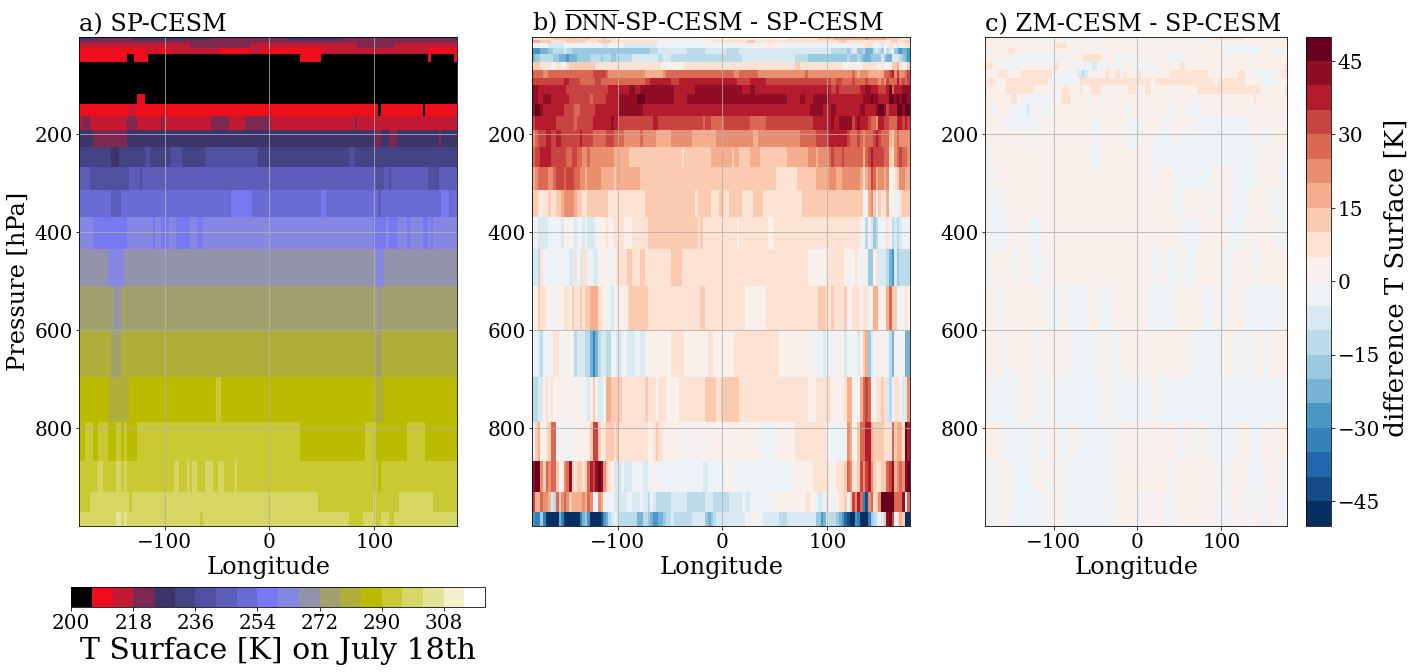

In [68]:
# plot zonal section two zonal band north of the equator 

fig=plt.figure(1,(23,9))

plt.subplot(1,3,1)

imag=plt.pcolormesh(lon,P[0:26]/100,T_SP_run[crash_2-1,:,49,:],
                                cmap=seism_, norm=norm_seism)
plt.grid(True)
sr=plt.gca()
sr.invert_yaxis()
plt.ylabel('Pressure [hPa]',fontsize=24)
plt.xlabel('Longitude',fontsize=24)

plt.title(r'a) SP-CESM',loc='left')

cbar_ax=fig.add_axes([0.12, 0.00, 0.25, 0.03])
cb=plt.colorbar(imag, label=r"T Surface [K]",cax=cbar_ax,orientation='horizontal')
cb.set_label(label=r"T Surface [K] on July "+ str(day_of_failure_round_2)+"th",fontsize=fz*1.5)

plt.subplot(1,3,2)
imag_2=plt.pcolormesh(lon,P[0:26]/100,T_DNN_overline[crash_2-1,:,49,:]-T_SP_run[crash_2-1,:,49,:],
                      cmap=seism_diff, norm=norm_seism_)
plt.grid(True)
sr=plt.gca()
sr.invert_yaxis()

plt.title(r'b) $\overline{\mathrm{DNN}}$-SP-CESM - SP-CESM',loc='left')
plt.xlabel('Longitude',fontsize=24)
    
cbar_ax_2 = fig.add_axes([0.45, 0.28, 0.40, 0.03])
cb=plt.colorbar(imag_2,cax=cbar_ax_2,ticks=np.arange(vmin0_diff,vmax0_diff+0.001,10),orientation='horizontal')
cb.set_label(label=r" difference T Surface [K]",fontsize=fz*1.3)    

plt.subplot(1,3,3)


plt.pcolormesh(lon,P[0:26]/100,T_ZM_scheme[crash_2-1,:,49,:]-T_SP_run[crash_2-1,:,49,:],
                                 cmap=seism_diff, norm=norm_seism_)
plt.grid(True)
sr=plt.gca()
sr.invert_yaxis()
cb=plt.colorbar()
cb.set_label(label=r" difference T Surface [K]",fontsize=fz*1.3)    
plt.xlabel('Longitude',fontsize=24)

plt.title(r'c) ZM-CESM - SP-CESM',loc='left')


Text(0.0, 1.0, 'c) ZM-CESM - SP-CESM')

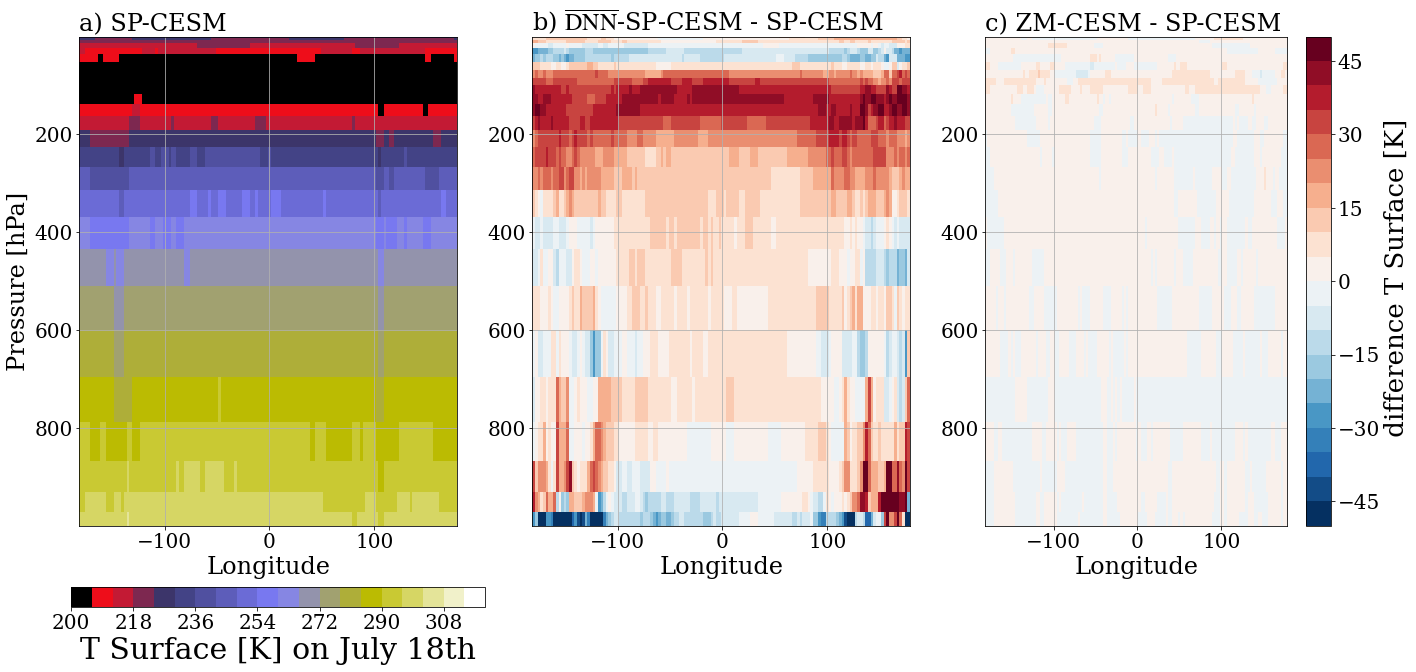

In [73]:
# plot zonal section three zonal band north of the equator 


fig=plt.figure(1,(23,9))

plt.subplot(1,3,1)

imag=plt.pcolormesh(lon,P[0:26]/100,T_SP_run[crash_2-1,:,50,:],
                                cmap=seism_, norm=norm_seism)
plt.grid(True)
sr=plt.gca()
sr.invert_yaxis()
plt.ylabel('Pressure [hPa]',fontsize=24)
plt.xlabel('Longitude',fontsize=24)

plt.title(r'a) SP-CESM',loc='left')

cbar_ax=fig.add_axes([0.12, 0.00, 0.25, 0.03])
cb=plt.colorbar(imag, label=r"T Surface [K]",cax=cbar_ax,orientation='horizontal')
cb.set_label(label=r"T Surface [K] on July "+ str(day_of_failure_round_2)+"th",fontsize=fz*1.5)

plt.subplot(1,3,2)
imag_2=plt.pcolormesh(lon,P[0:26]/100,T_DNN_overline[crash_2-1,:,50,:]-T_SP_run[crash_2-1,:,50,:],
                      cmap=seism_diff, norm=norm_seism_)
plt.grid(True)
sr=plt.gca()
sr.invert_yaxis()

plt.title(r'b) $\overline{\mathrm{DNN}}$-SP-CESM - SP-CESM',loc='left')
plt.xlabel('Longitude',fontsize=24)
    
cbar_ax_2 = fig.add_axes([0.45, 0.28, 0.40, 0.03])
cb=plt.colorbar(imag_2,cax=cbar_ax_2,ticks=np.arange(vmin0_diff,vmax0_diff+0.001,10),orientation='horizontal')
cb.set_label(label=r" difference T Surface [K]",fontsize=fz*1.3)    

plt.subplot(1,3,3)


plt.pcolormesh(lon,P[0:26]/100,T_ZM_scheme[crash_2-1,:,50,:]-T_SP_run[crash_2-1,:,50,:],
                                 cmap=seism_diff, norm=norm_seism_)
plt.grid(True)
sr=plt.gca()
sr.invert_yaxis()
cb=plt.colorbar()
cb.set_label(label=r" difference T Surface [K]",fontsize=fz*1.3)    
plt.xlabel('Longitude',fontsize=24)

plt.title(r'c) ZM-CESM - SP-CESM',loc='left')


Text(0.0, 1.0, 'c) ZM-CESM - SP-CESM')

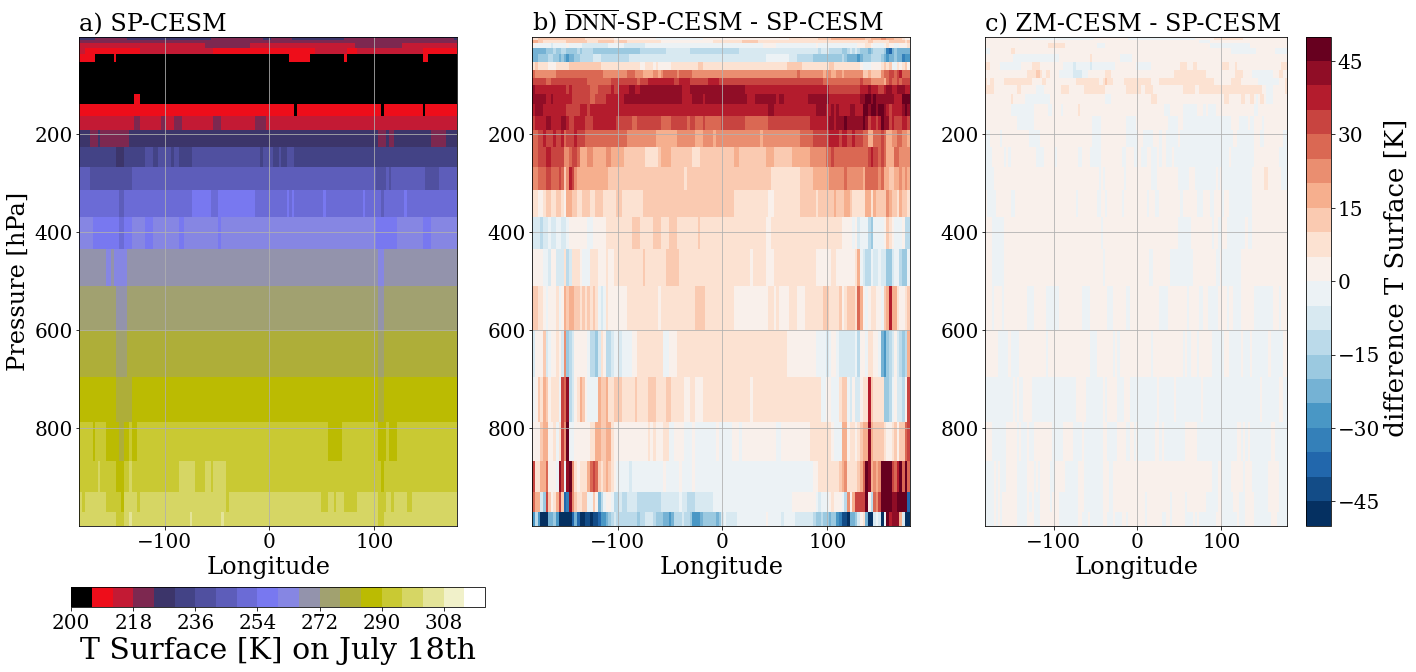

In [74]:
# plot zonal section four zonal band north of the equator 


fig=plt.figure(1,(23,9))

plt.subplot(1,3,1)

imag=plt.pcolormesh(lon,P[0:26]/100,T_SP_run[crash_2-1,:,51,:],
                                cmap=seism_, norm=norm_seism)
plt.grid(True)
sr=plt.gca()
sr.invert_yaxis()
plt.ylabel('Pressure [hPa]',fontsize=24)
plt.xlabel('Longitude',fontsize=24)

plt.title(r'a) SP-CESM',loc='left')

cbar_ax=fig.add_axes([0.12, 0.00, 0.25, 0.03])
cb=plt.colorbar(imag, label=r"T Surface [K]",cax=cbar_ax,orientation='horizontal')
cb.set_label(label=r"T Surface [K] on July "+ str(day_of_failure_round_2)+"th",fontsize=fz*1.5)

plt.subplot(1,3,2)
imag_2=plt.pcolormesh(lon,P[0:26]/100,T_DNN_overline[crash_2-1,:,51,:]-T_SP_run[crash_2-1,:,51,:],
                      cmap=seism_diff, norm=norm_seism_)
plt.grid(True)
sr=plt.gca()
sr.invert_yaxis()

plt.title(r'b) $\overline{\mathrm{DNN}}$-SP-CESM - SP-CESM',loc='left')
plt.xlabel('Longitude',fontsize=24)
    
cbar_ax_2 = fig.add_axes([0.45, 0.28, 0.40, 0.03])
cb=plt.colorbar(imag_2,cax=cbar_ax_2,ticks=np.arange(vmin0_diff,vmax0_diff+0.001,10),orientation='horizontal')
cb.set_label(label=r" difference T Surface [K]",fontsize=fz*1.3)    

plt.subplot(1,3,3)


plt.pcolormesh(lon,P[0:26]/100,T_ZM_scheme[crash_2-1,:,51,:]-T_SP_run[crash_2-1,:,51,:],
                                 cmap=seism_diff, norm=norm_seism_)
plt.grid(True)
sr=plt.gca()
sr.invert_yaxis()
cb=plt.colorbar()
cb.set_label(label=r" difference T Surface [K]",fontsize=fz*1.3)    
plt.xlabel('Longitude',fontsize=24)

plt.title(r'c) ZM-CESM - SP-CESM',loc='left')
